In [3]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 10, 'figure.figsize': (5, 4)}) # set font and plot size to be larger


In [1]:
import sqlite3

In [2]:
con = sqlite3.connect('ecommerce/sales_database.db')

In [4]:
df = pd.read_csv('ecommerce/sales_data_datatype_converted.csv',index_col=0)
df.head()

,order_id,product,quantity_ordered,price_each,order_date,customer_shipping_address,city_store,category,customer_gender,customer_age_range,discount
0,236670,Wired Headphones,16,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",Dallas,Headphones,Male,18-20,18
1,236671,Bose SoundSport Headphones,9,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",Los Angeles,Headphones,Male,21-25,21
2,236672,iPhone,8,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",New York City,Phone,Male,26-30,5
3,236673,AA Batteries (4-pack),12,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",San Francisco,Batteries,Female,31-40,8
4,236674,AA Batteries (4-pack),16,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",Boston,Batteries,Female,41-50,14


In [5]:
# collect all the products named iPhone
iphone_data = df[df['product']=='iPhone']
iphone_data.head()

,order_id,product,quantity_ordered,price_each,order_date,customer_shipping_address,city_store,category,customer_gender,customer_age_range,discount
2,236672,iPhone,8,700.0,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",New York City,Phone,Male,26-30,5
39,236709,iPhone,8,700.0,2019-08-04 9:00:00,"869 Jackson St, San Francisco, CA 94016",New York City,Phone,Female,31-40,1
60,236729,iPhone,6,700.0,2019-08-09 9:28:00,"635 Lake St, San Francisco, CA 94016",New York City,Phone,Female,18-20,20
100,236767,iPhone,12,700.0,2019-08-09 13:51:00,"41 Adams St, Dallas, TX 75001",Dallas,Phone,Male,41-50,9
121,236788,iPhone,6,700.0,2019-08-21 12:09:00,"598 13th St, Los Angeles, CA 90001",Los Angeles,Phone,Male,21-25,23


In [6]:
df['customer_age_range'].unique()

array(['18-20', '21-25', '26-30', '31-40', '41-50', '+50'], dtype=object)

In [7]:
# popularity of iphone among different Male users for different age groups
iphone_data_male = iphone_data[iphone_data['customer_gender']=='Male']
iphone_data_male.head(2)

,order_id,product,quantity_ordered,price_each,order_date,customer_shipping_address,city_store,category,customer_gender,customer_age_range,discount
2,236672,iPhone,8,700.0,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",New York City,Phone,Male,26-30,5
100,236767,iPhone,12,700.0,2019-08-09 13:51:00,"41 Adams St, Dallas, TX 75001",Dallas,Phone,Male,41-50,9


<Axes: title={'center': 'Iphone Popularity in Male as per age'}, ylabel='Frequency'>

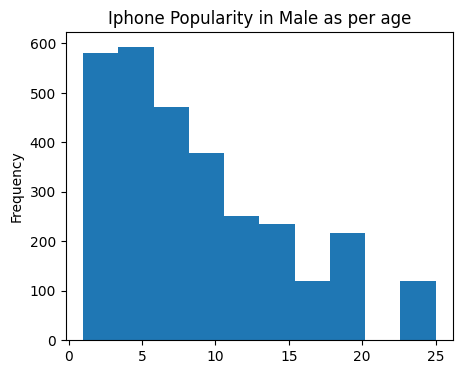

In [8]:
iphone_data_male['quantity_ordered'].plot(kind = 'hist',title='Iphone Popularity in Male as per age')

In [9]:
# writing the data to sqlite database
df.to_sql('ecommerce_purchases',con)

185950

In [11]:
# reading from sql query
df2 = pd.read_sql_query('select * from ecommerce_purchases',con)
df2.head()

,index,order_id,product,quantity_ordered,price_each,order_date,customer_shipping_address,city_store,category,customer_gender,customer_age_range,discount
0,0,236670,Wired Headphones,16,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",Dallas,Headphones,Male,18-20,18
1,1,236671,Bose SoundSport Headphones,9,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",Los Angeles,Headphones,Male,21-25,21
2,2,236672,iPhone,8,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",New York City,Phone,Male,26-30,5
3,3,236673,AA Batteries (4-pack),12,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",San Francisco,Batteries,Female,31-40,8
4,4,236674,AA Batteries (4-pack),16,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",Boston,Batteries,Female,41-50,14
